# IMF
The `IMF` class allows you to grab macroeconomic and financial data from the [IMF Database](https://www.imf.org/en/Data). This is essentially a wrapper around their data API.

---

## Example
To fetch data with this class you need to know the IMF dataset that has your series and the values of the query parameters. The class is built in a way that helps you find the desired series and fill out the query parameters. The workflow below gives an example.

In [19]:
from dataapi import IMF
import matplotlib.pyplot as plt

imf = IMF()

First let us look at all the available datasets using the **`dataflow`** method.

In [8]:
imf.dataflow()

,Database ID,Database Name
0,FAS,Financial Access Survey (FAS)
1,MCDREO,Middle East and Central Asia Regional Economic...
2,DOT,Direction of Trade Statistics (DOTS)
3,CDIS,Coordinated Direct Investment Survey (CDIS)
4,GFS01,Government Finance Statistics (GFS 2001)
5,BOPAGG,"Balance of Payments (BOP), World and Regional ..."
6,CPIS,Coordinated Portfolio Investment Survey (CPIS)
7,APDREO,Asia and Pacific Regional Economic Outlook (AP...
8,FM,Fiscal Monitor (FM)
9,AFRREO,Sub-Saharan Africa Regional Economic Outlook (...


As you can see, there are a lot of datasets. So it is recommended that you look for the dataset you need on the IMF's website and then looking for dataset code here.

As an example, let us use the ***Direction of Trade* (DOT)** dataset. Once you have your dataset, we got to check what are the query parameters for that table and their dimensions. To do this we use the **`data_structure`** method. The output `dim_code` is a list containing the query parameter names and `dim_codedict` is a dictionary where the keys are the query parameters and the values are dataframes with the available dimensions for that parameter.

In [17]:
dim_code, dim_codedict = imf.data_structure('DOT')

print('These are the query parameters')
print(dim_code)

These are the query parameters
['CL_FREQ', 'CL_AREA_DOT', 'CL_INDICATOR_DOT', 'CL_COUNTERPART_AREA_DOT']


In [16]:
for code in dim_codedict.keys():
    print('These are the possible values for the', code, 'query parameter')
    display(dim_codedict[code])

These are the possible values for the CL_FREQ query parameter


,CodeValue,CodeText
0,A,Annual
1,B,Bi-annual
2,Q,Quarterly
3,M,Monthly
4,D,Daily
5,W,Weekly


These are the possible values for the CL_AREA_DOT query parameter


,CodeValue,CodeText
0,AF,Afghanistan
1,F19,Africa not allocated
2,AL,Albania
3,DZ,Algeria
4,AS,American Samoa
5,AO,Angola
6,AI,Anguilla
7,AG,Antigua and Barbuda
8,AR,Argentina
9,AM,Armenia


These are the possible values for the CL_INDICATOR_DOT query parameter


,CodeValue,CodeText
0,TXG_FOB_USD,"Goods, Value of Exports, Free on board (FOB), ..."
1,TMG_CIF_USD,"Goods, Value of Imports, Cost, Insurance, Frei..."
2,TMG_FOB_USD,"Goods, Value of Imports, Free on board (FOB), ..."
3,TBG_USD,"Goods, Value of Trade Balance, US Dollars"


These are the possible values for the CL_COUNTERPART_AREA_DOT query parameter


,CodeValue,CodeText
0,AF,Afghanistan
1,F19,Africa not allocated
2,AL,Albania
3,DZ,Algeria
4,AS,American Samoa
5,AO,Angola
6,AI,Anguilla
7,AG,Antigua and Barbuda
8,AR,Argentina
9,AM,Armenia


Finnally, now that we have all the elements of the query, we can grab our series. Lets see how much did brazil export to the US on a yearly frequency.

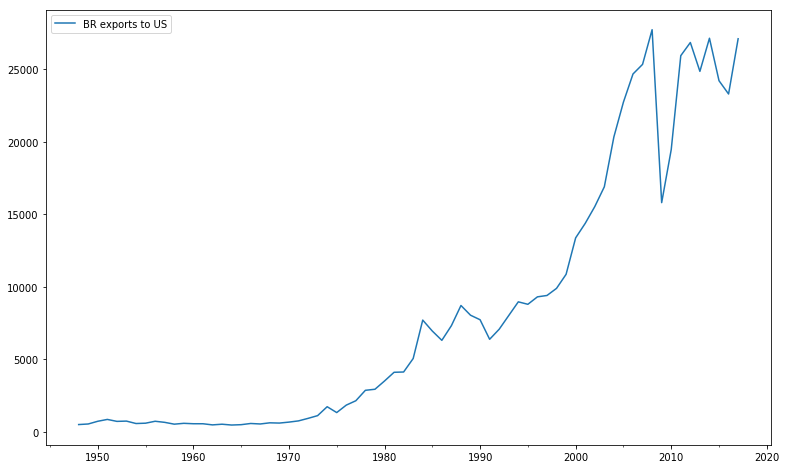

In [24]:
query_filter = {'CL_FREQ': 'A',
                'CL_AREA_DOT': 'BR',
                'CL_INDICATOR_DOT': 'TXG_FOB_USD',
                'CL_COUNTERPART_AREA_DOT': 'US'}

df = imf.compact_data('DOT', query_filter, 'BR exports to US')
df.plot(figsize=(13, 8))

---
# Author
Gustavo Amarante